In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
# 겹치는 데이터 삭제

del titanic['alive']
del titanic['embarked']
del titanic['alone']
del titanic['who']

In [5]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,deck,embark_town
0,0,3,male,22.0,1,0,7.2500,Third,True,NaN,Southampton
1,1,1,female,38.0,1,0,71.2833,First,False,C,Cherbourg
2,1,3,female,26.0,0,0,7.9250,Third,False,NaN,Southampton
3,1,1,female,35.0,1,0,53.1000,First,False,C,Southampton
4,0,3,male,35.0,0,0,8.0500,Third,True,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,True,NaN,Southampton
887,1,1,female,19.0,0,0,30.0000,First,False,B,Southampton
888,0,3,female,NaN,1,2,23.4500,Third,False,NaN,Southampton
889,1,1,male,26.0,0,0,30.0000,First,True,C,Cherbourg


In [6]:
# 데이터 기본 정보 확인

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   class        891 non-null    category
 8   adult_male   891 non-null    bool    
 9   deck         203 non-null    category
 10  embark_town  889 non-null    object  
dtypes: bool(1), category(2), float64(2), int64(4), object(2)
memory usage: 58.9+ KB


In [8]:
titanic.isnull().sum() #null 갯수 확인

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
adult_male       0
deck           688
embark_town      2
dtype: int64

In [9]:
 titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<hr>

In [10]:
# 각 pclass 별 총 인원 구하기
total_people = titanic.groupby('pclass').count()
total_people
total_people = total_people.iloc[:, 0:1]
total_people

,survived
pclass,
1,216
2,184
3,491


In [11]:
# 각 plcass 별 생존 인원
total_survived = titanic.groupby('pclass').sum()
total_survived = total_survived.iloc[:, 0:1]
total_survived

,survived
pclass,
1,136
2,87
3,119


In [12]:
# 합치기
df = pd.concat([ total_people, total_survived], axis=1)
df.columns = ['총인원', '생존자']
df['생존확률(%)'] = df['생존자'] / df['총인원'] * 100
df

,총인원,생존자,생존확률(%)
pclass,,,
1,216,136,62.962963
2,184,87,47.282609
3,491,119,24.236253


In [13]:
# 확인 과정

titanic.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,adult_male
pclass,,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687,0.550926
2,0.472826,29.877630,0.402174,0.380435,20.662183,0.538043
3,0.242363,25.140620,0.615071,0.393075,13.675550,0.649695


<hr>

In [14]:
# pclass 별 남성 여성 생존 확률 구하기 
table = titanic.pivot_table(values='survived', index=['pclass'], columns=['sex'], aggfunc=np.mean)
table

sex,female,male
pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


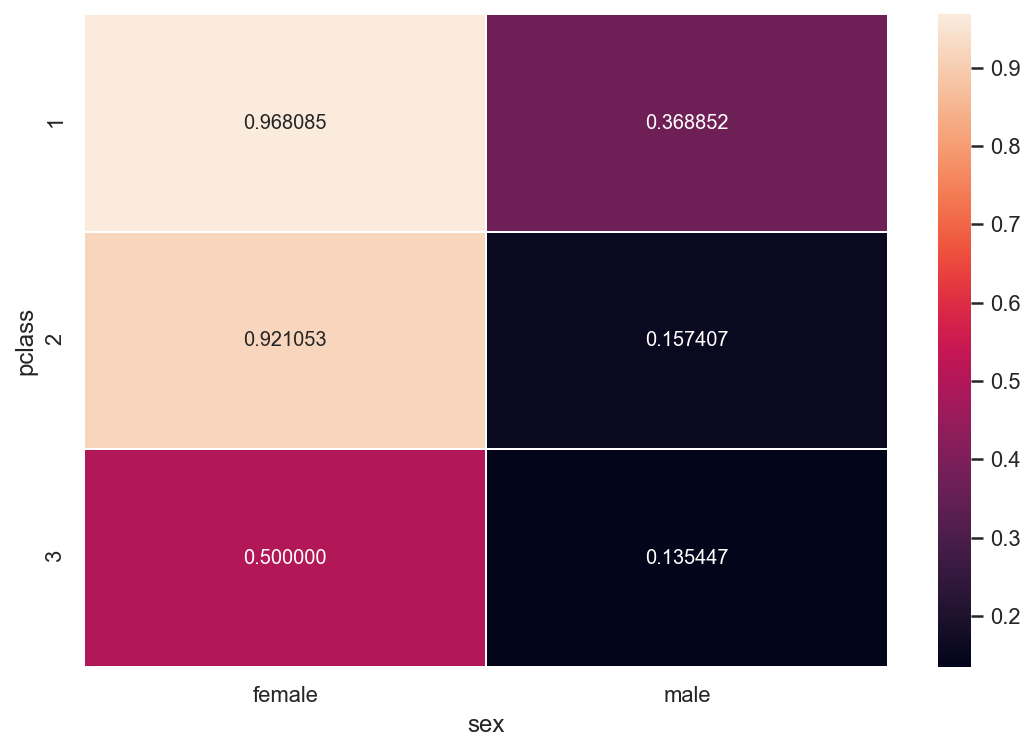

In [16]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(table, annot=True, fmt="f", linewidths=.5, ax=ax);

In [20]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [18]:
table = titanic.pivot_table(values='survived', index=['pclass'], columns=['alone'], aggfunc=np.mean)
table.columns = ['가족', '싱글']
table

,가족,싱글
pclass,,
1,0.728972,0.532110
2,0.637500,0.346154
3,0.299401,0.212963


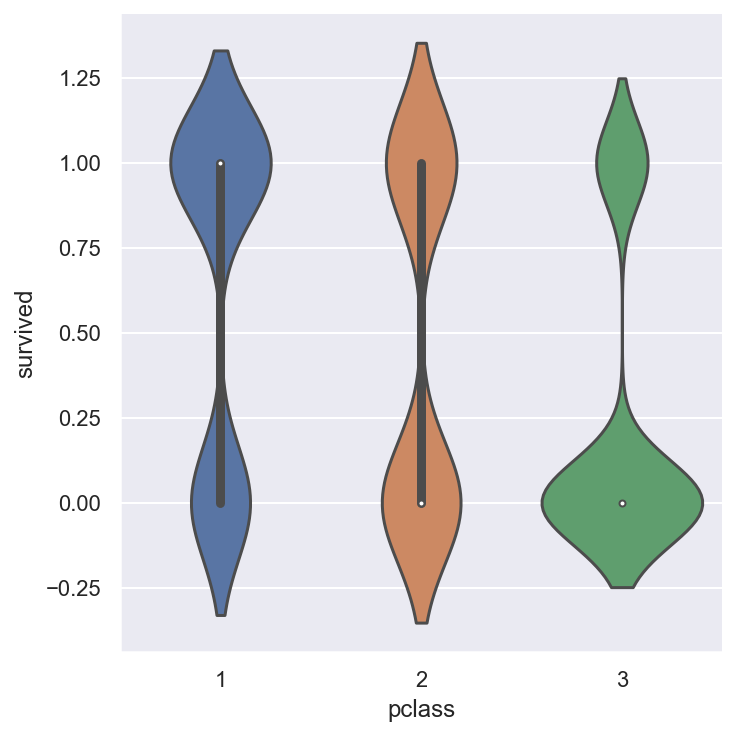

In [22]:
sns.catplot(x = 'pclass', y = 'survived', data = titanic, kind = 'violin');

C:\Users\xodlr_000\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


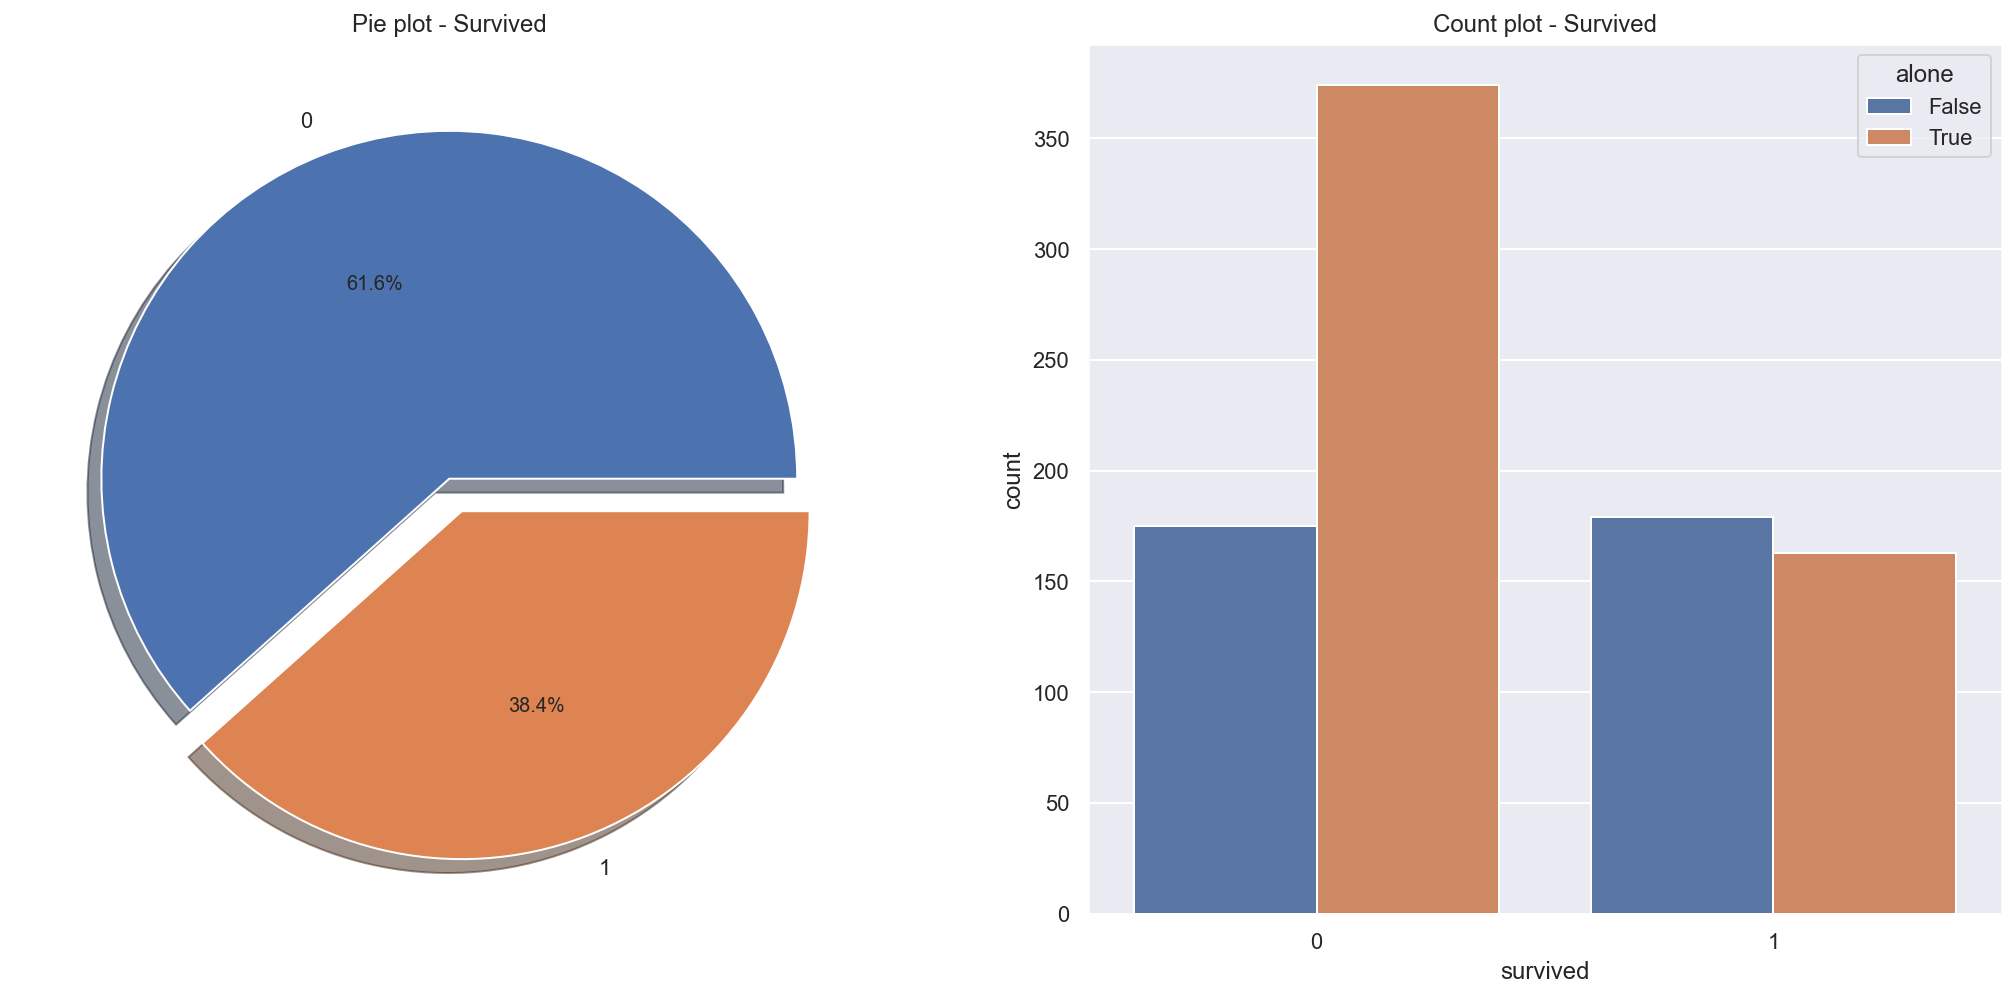

In [23]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # 최초 창의 크기를 가로 세로 18, 8인치로 설정
# df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
titanic['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
#  ax=ax[0] : 첫번째 표에 그리겠다(왼쪽)
#  ax=ax[1] : 오른쪽 두번째 표에 그리겠다.
#explode = 두 조각간의 거리
#autopct = 각 범주가 데이터에서 차지하는 비율,
ax[0].set_title('Pie plot - Survived') # 제목 위에 나오게 하기
ax[0].set_ylabel('') # y축 라벨을 없앤다! ,'' 그냥 비워둔다!
sns.countplot('survived', data=titanic, ax=ax[1], hue ='alone')
# sns.countplot('Series 명', data = 데이터 종류, 위치)
ax[1].set_title('Count plot - Survived')
plt.show() # 마지막에 써준당! 보여달라 나에게 그래프를./